# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">INTRODUCTION</a></li>
<li><a href="#wrangling">DATA WRANGLING</a></li>
<li><a href="#gathering">Gathering</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#da">DATA ANALYSIS</a></li>
<li><a href="#conclusions">CONCLUSIONS</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<a id='gathering'></a>
### Gathering

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='assessing'></a>
### Assessing

#### Assessing of the whole dataframe

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110534,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110535,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110536,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110537,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110538,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.shape

(110539, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110539 entries, 0 to 110538
Data columns (total 14 columns):
PatientId         110539 non-null float64
AppointmentID     110539 non-null int64
Gender            110539 non-null object
ScheduledDay      110539 non-null object
AppointmentDay    110539 non-null object
Age               110539 non-null int64
Neighbourhood     110539 non-null object
Scholarship       110539 non-null int64
Hipertension      110539 non-null int64
Diabetes          110539 non-null int64
Alcoholism        110539 non-null int64
Handcap           110539 non-null int64
SMS_received      110539 non-null int64
No-show           110535 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105390e+05,1.105390e+05,110539.000000,110539.000000,110539.000000,110539.000000,110539.000000,110539.000000,110539.000000
mean,1.474895e+14,5.675303e+06,37.088059,0.098255,0.197252,0.071866,0.030415,0.022246,0.321018
std,2.560877e+14,7.129480e+04,23.110107,0.297660,0.397926,0.258267,0.171726,0.161534,0.466870
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172877e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           4
dtype: int64

In [9]:
df.duplicated().sum()

8

#### Assessing of concrete variables

In [10]:
df.groupby('Gender')['AppointmentID'].count()

Gender
F    71841
M    38698
Name: AppointmentID, dtype: int64

In [11]:
print(df['ScheduledDay'].min())
print(df['ScheduledDay'].max())

2015-11-10T07:13:56Z
2016-06-08T20:07:23Z


In [12]:
print(df['AppointmentDay'].min())
print(df['AppointmentDay'].max())

2016-04-29T00:00:00Z
2016-06-08T00:00:00Z


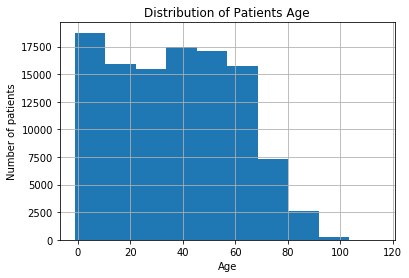

In [13]:
#Age disbribution overview
df['Age'].hist()
plt.title('Distribution of Patients Age');
plt.xlabel('Age')
plt.ylabel('Number of patients');

In [14]:
df['No-show'].value_counts()/df.shape[0]

No     0.798035
Yes    0.201929
Name: No-show, dtype: float64

In [15]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3878
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3132
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2218
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1978
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1837
REDENÇÃO                    

<a id='cleaning'></a>
### Cleaning

#### Define

Drop duplicated registers

#### Code

In [16]:
df.duplicated().sum()

8

In [17]:
df.drop_duplicates(inplace=True)

#### Test

In [18]:
df.duplicated().sum()

0

#### Define

Drop registers whose response variable (No-show) is Null

#### Code

In [19]:
df['No-show'].isna().sum()

4

In [20]:
df=df[df['No-show'].isna()==False]

#### Test

In [21]:
df['No-show'].isna().sum()

0

In [22]:
df.shape

(110527, 14)

In [23]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Define

Format No-show variable with Yes=1 and No=0 values and convert it to number

#### Code

In [24]:
df.loc[df['No-show'] == 'No','No-show'] = 0
df.loc[df['No-show'] == 'Yes','No-show'] = 1

In [25]:
df['No-show']=df['No-show'].astype(int)

#### Test

In [26]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

#### Define

Conver to datetime the ScheduledDay and AppointmentDay columns.

#### Code

In [27]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### Test

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110538
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int32
dtypes: datetime64[ns](2), float64(1), int32(1), int64(8), object(2)
memory usage: 12.2+ MB


In [29]:
print(df['ScheduledDay'].min())
print(df['ScheduledDay'].max())

2015-11-10 07:13:56
2016-06-08 20:07:23


In [30]:
print(df['AppointmentDay'].min())
print(df['AppointmentDay'].max())

2016-04-29 00:00:00
2016-06-08 00:00:00


#### Define

Drop registers whose Scheduled day is later than the Appointment day. These registers are wrong and might distort the analysis

#### Code

In [31]:
df['diff_App_Sch_Day']=df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date

In [32]:
df['diff_App_Sch_Day']=df['diff_App_Sch_Day']/np.timedelta64(1,'D')

In [33]:
df=df[df['diff_App_Sch_Day']>=0]

#### Test

In [34]:
df['diff_App_Sch_Day'].min()

0.0

#### Define

Drop registers with Age < 0

#### Code

In [35]:
(df['Age']<0).sum()

1

In [36]:
df=df[df['Age']>=0]

#### Test

In [37]:
(df['Age']<0).sum()

0

<a id='da'></a>
## Data Analysis

In [38]:
df['No-show'].value_counts()*100/df.shape[0]

0    79.810172
1    20.189828
Name: No-show, dtype: float64

In [73]:
#Definition of function for plotting a bar chart
def plot_barchart(locations,measurement,labels,p_title,p_xlabel,p_ylabel,orientation='v'):
    '''
    Plot bar chart based on provided parameters. Horizontal or vertical orientation can be chosen.
    
    INPUT:
    locations - range of locations where labels are placed
    measurement - list of numerical values
    labels - list of strings with the categorical values
    p_title - bar chart title
    p_xlabel - x axis label of bar chart
    p_ylabel - y axis label of bar chart
    orientation - bar chart orientation ('h'=horizontal or 'v'=vertical). Default value = 'v' (vertical)
    
    OUTPUT:
    None
    '''
    
    if orientation == 'h':
        plt.barh(locations,measurement,tick_label=labels)
    else:
        plt.bar(locations,measurement,tick_label=labels)
        
    plt.title(p_title)
    plt.xlabel(p_xlabel)
    plt.ylabel(p_ylabel)
    
    return None

### I. Does the time between Scheduled and Appointment dates have an effect on the attendance rate?

In [39]:
#Average days for each No-show value
days_avg=df.groupby('No-show')['diff_App_Sch_Day'].mean()
days_avg

No-show
0     8.754759
1    15.835484
Name: diff_App_Sch_Day, dtype: float64

In [68]:
#Variables and parameters are defined for plotting the bar chart
locations_a =np.arange(len(days_avg)) #set the locations according to how we want to show the data
measurement_a = days_avg
labels_a = ['Show','No-show']  #labels are created
title_a = 'Averaged days between the Scheduled and Appointment dates'
xlabel_a = 'Averaged days'
ylabel_a = ''
orientation_a = 'h'

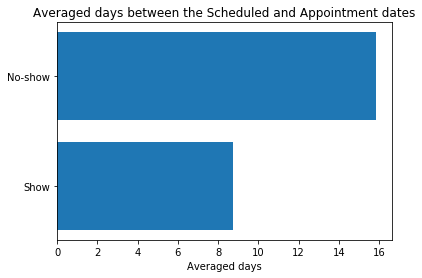

In [69]:
#Plotting average days for each No-show value
plot_barchart(locations_a,measurement_a,labels_a,title_a,xlabel_a,ylabel_a,orientation_a)

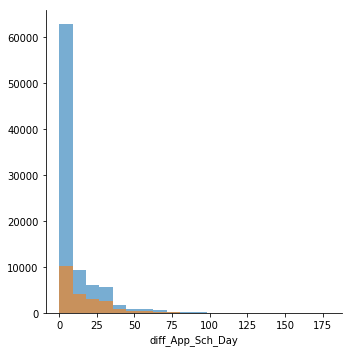

In [42]:
#Both No-show values are shown in a histogram
bins_n = 20
g = sb.FacetGrid(data=df,hue='No-show',height=5)
g.map(plt.hist,'diff_App_Sch_Day',bins=bins_n, alpha=0.6)

#### Conclusion:
Patients that did not show up booked the appointment 1 week, on average, earlier than patients that showed up.

### II. How does patients' age impact on absenteeism?

In [43]:
#Age range is created
df['Age_Range']='0-9'
df.loc[df['Age']>=10,'Age_Range'] = '10-19'
df.loc[df['Age']>=20,'Age_Range'] = '20-29'
df.loc[df['Age']>=30,'Age_Range'] = '30-39'
df.loc[df['Age']>=40,'Age_Range'] = '40-49'
df.loc[df['Age']>=50,'Age_Range'] = '50-59'
df.loc[df['Age']>=60,'Age_Range'] = '60-69'
df.loc[df['Age']>=70,'Age_Range'] = '70-79'
df.loc[df['Age']>=80,'Age_Range'] = '>=80'

In [44]:
#No-show mean is calculated (multiplied by 100 to get percentages)
Age_Range_App = df.groupby('Age_Range')['No-show'].mean()*100
Age_Range_App

Age_Range
0-9      19.932471
10-19    25.172014
20-29    24.667835
30-39    21.746869
40-49    20.268844
50-59    17.499842
60-69    15.072415
70-79    15.200539
>=80     16.329566
Name: No-show, dtype: float64

In [71]:
#Variables and parameters are defined for plotting the bar chart
locations_a =np.arange(len(Age_Range_App)) #set the locations according to how we want to show the data
measurement_a = Age_Range_App
labels_a = Age_Range_App.index #labels are created
title_a = 'Percentage of patients not showing up at the medical appointment by age'
xlabel_a = 'Patients Age'
ylabel_a = 'No-show average (%)'
orientation_a = 'v'

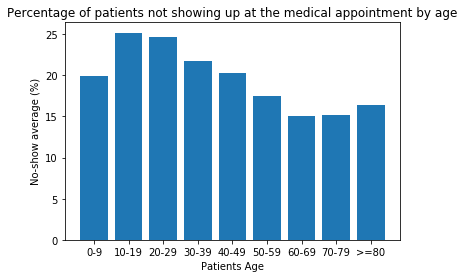

In [72]:
#Percentage of patiens not showing up is represented in a bar chart
plot_barchart(locations_a,measurement_a,labels_a,title_a,xlabel_a,ylabel_a,orientation_a)

#### Conclusion:
Younger generations have lower attendance rate than older ones.

### III. Is the patients' location an important aspect to consider regarding the attendance?

In [46]:
#No-show mean is calculated by neighbourhood
Neigh_NoShow = df.groupby('Neighbourhood')['No-show'].mean()*100

In [47]:
#Appointment count percentage is calculated by neighbourhood
Neigh_CountWeight = df.groupby('Neighbourhood')['AppointmentID'].count()*100/df.shape[0]

In [48]:
#Index is reset
Neigh_NoShow=Neigh_NoShow.reset_index()
Neigh_CountWeight=Neigh_CountWeight.reset_index()

In [49]:
#Both dataframes are merged and columns renamed
Neighbourhood_Stats = Neigh_CountWeight.merge(Neigh_NoShow)
Neighbourhood_Stats=Neighbourhood_Stats.rename(columns={"AppointmentID":"AppointCount (%)","No-show":"No-show (%)"})
Neighbourhood_Stats.head()

,Neighbourhood,AppointCount (%),No-show (%)
0,AEROPORTO,0.007238,12.500000
1,ANDORINHAS,2.046670,23.032714
2,ANTÔNIO HONÓRIO,0.245202,18.450185
3,ARIOVALDO FAVALESSA,0.255155,21.985816
4,BARRO VERMELHO,0.382733,21.513002


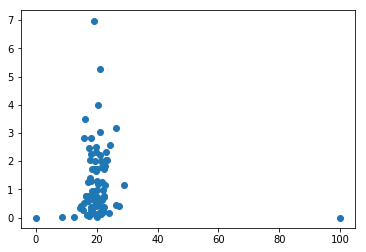

In [50]:
#Represent both variables in a scatter plot
plt.scatter(Neighbourhood_Stats['No-show (%)'],Neighbourhood_Stats['AppointCount (%)'])

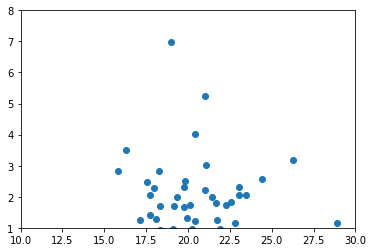

In [51]:
#Represent both variables in a scatter plot (zoomed in)
plt.scatter(Neighbourhood_Stats['No-show (%)'],Neighbourhood_Stats['AppointCount (%)'])
plt.xlim([10,30])
plt.ylim([1,8]);

In [52]:
Neighbourhood_Stats['AppointCount (%)'].median()

0.7699894137765674

Awareness campaigns can be done on neighbourhoods whose:
 - number of appointments > median AND
 - have the highest No-show rate

In [53]:
#Select neighbourhoods with number of appointments > median
Neigh_mostApp = Neighbourhood_Stats[Neighbourhood_Stats['AppointCount (%)']>Neighbourhood_Stats['AppointCount (%)'].median()]

In [54]:
#Neighbourhoods with highest No-show rate
Neigh_mostApp[['Neighbourhood','No-show (%)']].sort_values(by='No-show (%)',ascending=False).head(5)

,Neighbourhood,No-show (%)
70,SANTOS DUMONT,28.918495
36,ITARARÉ,26.266363
40,JESUS DE NAZARETH,24.395373
33,ILHA DO PRÍNCIPE,23.477493
9,CARATOÍRA,23.040936


In [55]:
#Neighbourhoods with lowest No-show rate
Neigh_mostApp[['Neighbourhood','No-show (%)']].sort_values(by='No-show (%)',ascending=False).tail(5)

,Neighbourhood,No-show (%)
57,REDENÇÃO,17.707663
69,SANTO ANTÔNIO,17.565598
13,CONSOLAÇÃO,17.163636
39,JARDIM DA PENHA,16.275471
66,SANTA MARTHA,15.841584


#### Conclusion:
There is a gap of up to 13 percentual points between the neighbourhoods with highest and lowest absenteeism rate once we have filtered out the neighbourhoods with the lowest appointments.

Awareness campaign could be launch in the neighbourhoods with the highest absenteeism rate.

<a id='conclusions'></a>
## Conclusions

The analysis showed that the sooner the patients scheduled the appointment the more likely they were for not showing up at the doctor's office. Taking a close look at the patients' profile, I learnt that younger generations are more prone than older ones to not showing up, and also that the attendance rate might drastically vary between different patient' locations.